# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2


In [1]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109, stratify=y)

In [14]:
X_train.shape

(1257, 64)

### Primero trabajamos con una versión soft de la SVM lineal. La versión soft acepta algunos datos malclasificados de manera de relajar el problema hard SVM. El parámetro nu controla la cota superior en la fracción de ejemplos mal clasificados. Fíjese que siempre trabajamos con datos estandarizados!!

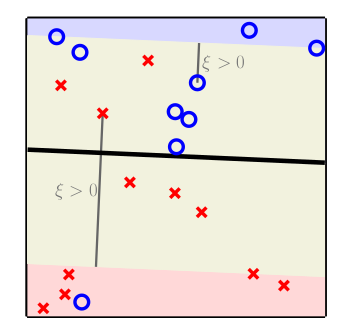

In [4]:
from IPython.display import Image
Image(filename='nuSVM.png')

In [5]:
from sklearn.svm import NuSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

range_nu = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for nu_ in range_nu:
    clf = make_pipeline(StandardScaler(), NuSVC(nu=nu_))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For nu =",
        nu_,
        "The accuracy is :",
        acc,
    )
    
    

For nu = 0.1 The accuracy is : 0.975925925925926
For nu = 0.2 The accuracy is : 0.9685185185185186
For nu = 0.3 The accuracy is : 0.9629629629629629
For nu = 0.4 The accuracy is : 0.9537037037037037
For nu = 0.5 The accuracy is : 0.9407407407407408
For nu = 0.6 The accuracy is : 0.9296296296296296


Ver parámetros en: https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html

In [6]:
clf = make_pipeline(StandardScaler(), NuSVC(nu=0.1))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.98      0.99        55
           2       1.00      0.98      0.99        53
           3       1.00      0.96      0.98        55
           4       0.88      0.96      0.92        54
           5       1.00      0.96      0.98        55
           6       0.98      1.00      0.99        54
           7       0.95      0.98      0.96        54
           8       0.98      0.96      0.97        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



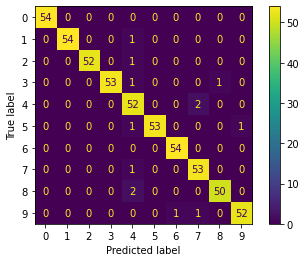

In [7]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

### Ahora vamos a usar el kernel trick sobre la nuSVM. Vamos a probar cuatro kernels (lineal, polinomial, radial basis, y sigmoide). En el polinomial podemos controlar el grado. Fíjese que siempre trabajamos con datos estandarizados!!

In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4, 5, 6]

for kernel_ in kernels:
    if kernel_ == 'poly':
        for degree_ in degrees:
            clf = make_pipeline(StandardScaler(), NuSVC(nu=0.1, kernel=kernel_, degree= degree_))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = metrics.accuracy_score(y_test, y_pred)
            print(
                "For kernel =",
                kernel_,
                "with degree =",
                degree_,
                "The accuracy is :",
                acc,
            )
    else:
        clf = make_pipeline(StandardScaler(), NuSVC(nu=0.1, kernel=kernel_))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        print(
            "For kernel =",
            kernel_,
            "The accuracy is :",
            acc,
        )
    

For kernel = linear The accuracy is : 0.9851851851851852
For kernel = poly with degree = 2 The accuracy is : 0.9814814814814815
For kernel = poly with degree = 3 The accuracy is : 0.987037037037037
For kernel = poly with degree = 4 The accuracy is : 0.9666666666666667
For kernel = poly with degree = 5 The accuracy is : 0.9388888888888889
For kernel = poly with degree = 6 The accuracy is : 0.9055555555555556
For kernel = rbf The accuracy is : 0.975925925925926
For kernel = sigmoid The accuracy is : 0.9092592592592592


https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200

In [9]:
clf = make_pipeline(StandardScaler(), NuSVC(nu=0.1, kernel='poly', degree=3))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.96      0.98        55
           2       1.00      0.98      0.99        53
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        54
           5       1.00      0.98      0.99        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.91      1.00      0.95        52
           9       0.98      0.98      0.98        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



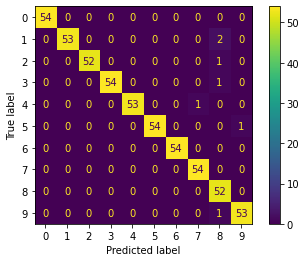

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

### Fíjese que logramos tener un clasificador casi perfecto en testing!! Mucho mejor que el hard SVM de la semana pasada.